In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


# Lung Cancer Prediction — LightGBM
**Author: Abdelrady Saady  
**Dataset:** `/kaggle/input/lung-cancer/survey lung cancer.csv`  
**Goal:** Build a predictive model (LightGBM) to estimate the probability (%) of lung cancer given clinical and behavioral features.  
**Contents:** Data loading → EDA → Preprocessing → Modeling → Evaluation → Visualizations → Save outputs.


✅ Data Loaded Successfully
Shape: (309, 16)
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0           

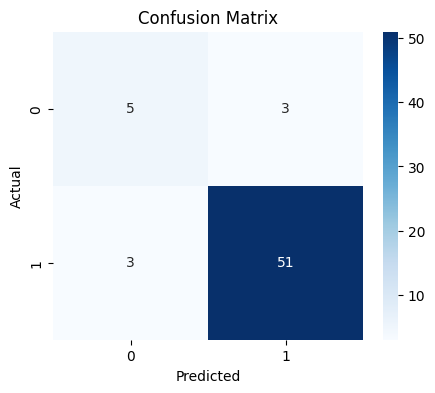

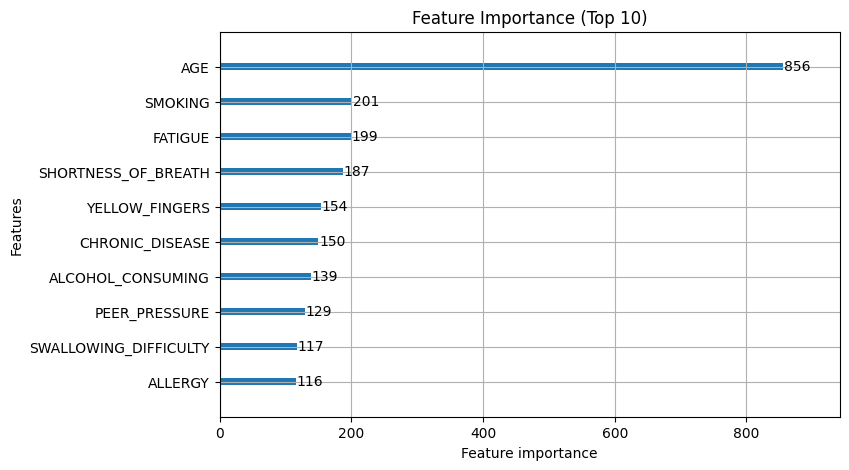


🧠 Predicted Lung Cancer Probability: 99.98%

✅ Notebook completed successfully.


In [2]:
# Lung Cancer Prediction using LightGBM
# Dataset: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer
# Author: [Your Name]
# Date: 2025

# -----------------------------
# 1. Import libraries
# -----------------------------
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 2. Load dataset
# -----------------------------
data = pd.read_csv("/kaggle/input/lung-cancer/survey lung cancer.csv")
data.columns = data.columns.str.strip().str.upper()

print("✅ Data Loaded Successfully")
print("Shape:", data.shape)
print(data.head())

# -----------------------------
# 3. Preprocessing
# -----------------------------
# Convert target to binary
data["LUNG_CANCER"] = data["LUNG_CANCER"].str.upper().map({"YES": 1, "NO": 0})

# Encode Gender
le = LabelEncoder()
data["GENDER"] = le.fit_transform(data["GENDER"])

# Split features and target
X = data.drop("LUNG_CANCER", axis=1)
y = data["LUNG_CANCER"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("\n📊 Data ready for training")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# -----------------------------
# 4. Train LightGBM model
# -----------------------------
model = lgb.LGBMClassifier(
    objective="binary",
    learning_rate=0.05,
    n_estimators=300,
    num_leaves=31,
    random_state=42
)

model.fit(X_train, y_train)
print("\n✅ Model training completed")

# -----------------------------
# 5. Evaluation
# -----------------------------
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob >= 0.5).astype(int)

auc = roc_auc_score(y_test, y_pred_prob)
acc = accuracy_score(y_test, y_pred)

print(f"\n🎯 Accuracy: {acc:.4f}")
print(f"💡 AUC Score: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -----------------------------
# 6. Confusion Matrix
# -----------------------------
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# 7. Feature Importance
# -----------------------------
lgb.plot_importance(model, max_num_features=10, figsize=(8,5))
plt.title("Feature Importance (Top 10)")
plt.show()

# -----------------------------
# 8. Prediction on new sample
# -----------------------------
# Example new data
new_sample = pd.DataFrame({
    "GENDER": [le.transform(["M"])[0]],
    "AGE": [65],
    "SMOKING": [2],
    "YELLOW_FINGERS": [2],
    "ANXIETY": [2],
    "PEER_PRESSURE": [1],
    "CHRONIC DISEASE": [1],
    "FATIGUE": [2],
    "ALLERGY": [1],
    "WHEEZING": [2],
    "ALCOHOL CONSUMING": [2],
    "COUGHING": [2],
    "SHORTNESS OF BREATH": [2],
    "SWALLOWING DIFFICULTY": [2],
    "CHEST PAIN": [2]
})

prob = model.predict_proba(new_sample)[:, 1][0]
print(f"\n🧠 Predicted Lung Cancer Probability: {prob * 100:.2f}%")

# -----------------------------
# 9. Summary
# -----------------------------
print("\n✅ Notebook completed successfully.")

